In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
import streamlit as st

In [97]:
from streamlit_gsheets import GSheetsConnection
conn = st.connection("gsheets", type=GSheetsConnection)

data = conn.read(
    worksheet="2024_pixel",
    ttl="10m",
    usecols=range(13),
    nrows=31
)
first_col = data.columns[0]
data = data.rename(columns={first_col: 'id_day'})
data = data.set_index('id_day')
data = data.fillna('0')

2023-12-24 23:47:26.890 No runtime found, using MemoryCacheStorageManager


In [100]:
data.head()

,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,Relaxed,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2,0,Excited,0,0,0,0,0,0,0,0,0,0
3,0,Happy,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
#data = pd.read_csv('pixel_year - 2024.csv', index_col=0).fillna('Missing')
#data.head()

In [102]:
col_hex = sns.color_palette("Set2", 8).as_hex()
col_hex

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [103]:
for el in col_hex:
    print(el)

#66c2a5
#fc8d62
#8da0cb
#e78ac3
#a6d854
#ffd92f
#e5c494
#b3b3b3


In [104]:
pixel_val_map = {
    '0': 0,
    'Missing': 1,
    'Happy': 2,
    'Normal': 3, 
    'Relaxed': 4,
    'Sad': 5,
    'Excited': 6
}

pixel_col_map = {
    '0': '#b3b3b3',
    'Missing': '#000000',
    'Happy': '#ffd92f',
    'Normal': '#fc8d62', 
    'Relaxed': '#66c2a5',
    'Sad': '#8da0cb',
    'Excited': '#e78ac3'
}

In [105]:
list(pixel_col_map.values())

['#b3b3b3', '#000000', '#ffd92f', '#fc8d62', '#66c2a5', '#8da0cb', '#e78ac3']

In [106]:
for col in data.columns:
    data[col] = data[col].map(pixel_val_map)

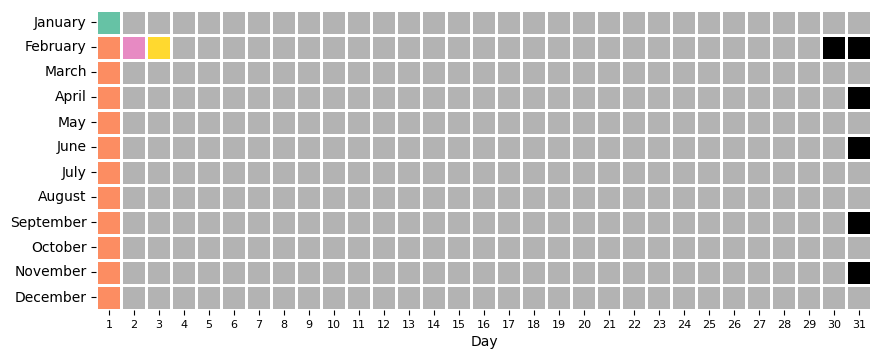

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(
    data.transpose(),
    cmap=list(pixel_col_map.values()),
    cbar=False,
    linewidths=1,
    linecolor='white',
    square=True,
    xticklabels=1,
    ax=ax
)
ax.set_xticklabels(labels=list(data.index), rotation=0, fontsize=8)
ax.set_xlabel('Day')
plt.show()